In [1]:
!pip install python-whois

In [2]:
!pip install vt

In [3]:
!pip install xgboost

In [4]:
!pip install lightgbm

In [5]:
!pip install tld

In [6]:
!pip install googlesearch-python

In [4]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import itertools
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import math
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import plot_roc_curve
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import os
import socket
import whois
from datetime import datetime
import time
from bs4 import BeautifulSoup
import urllib
import bs4
import os
import csv
from tld import get_tld, is_tld
from urllib.parse import urlparse
import os.path

In [5]:
os.chdir('C:\\Users\\vijay\\Desktop\\Python-programs')

In [6]:
os.getcwd()

'C:\\Users\\vijay\\Desktop\\Python-programs'

In [7]:
df=pd.read_csv('C:\\Users\\vijay\\Desktop\\Python-programs\\multiclass_set_randomized.csv')
print(df.shape)
df.head()

(106230, 2)


url      type
0  http://www.keve-kiserdo.hu/portal/index.php?op...      spam
1                          www.agdealer.com/keystone  phishing
2                            sbcspa.tripod.com/sbcs/  phishing
3  hockeydraft.ca/players/profile.aspx?id=4132&na...    benign
4        210.37.11.238/jm32/includes/site/config.bin   malware

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106230 entries, 0 to 106229
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     106230 non-null  object
 1   type    106230 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [9]:
df.type.value_counts()

malware     27424
phishing    26773
benign      26144
spam        25889
Name: type, dtype: int64

In [10]:
df.isnull().sum()

url     0
type    0
dtype: int64

In [11]:
count = df.type.value_counts()
count

malware     27424
phishing    26773
benign      26144
spam        25889
Name: type, dtype: int64

In [12]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

In [13]:
#Feature Engineering

In [14]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [15]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [16]:
df['count.'] = df['url'].apply(lambda i: i.count('.'))
df.head()

url      type  use_of_ip  \
0  http://www.keve-kiserdo.hu/portal/index.php?op...      spam          0   
1                          www.agdealer.com/keystone  phishing          0   
2                            sbcspa.tripod.com/sbcs/  phishing          0   
3  hockeydraft.ca/players/profile.aspx?id=4132&na...    benign          0   
4        210.37.11.238/jm32/includes/site/config.bin   malware          1   

   abnormal_url  count.  
0             1       3  
1             0       2  
2             0       2  
3             0       2  
4             0       4

In [17]:
df['count-www'] = df['url'].apply(lambda i: i.count('www'))
df['count@'] = df['url'].apply(lambda i: i.count('@'))
df['count//'] = df['url'].apply(lambda i: i.count('//'))
df['count?'] = df['url'].apply(lambda i: i.count('?'))
df['count='] = df['url'].apply(lambda i: i.count('='))
df['count_comma'] = df['url'].apply(lambda i: i.count(','))
df['count*'] = df['url'].apply(lambda i: i.count('*'))
df['count+'] = df['url'].apply(lambda i: i.count('+'))
df['count!'] = df['url'].apply(lambda i: i.count('!'))
df['count%'] = df['url'].apply(lambda i: i.count('%'))
df['count-'] = df['url'].apply(lambda i: i.count('-'))
df['count_quote'] = df['url'].apply(lambda i: i.count('"'))
from urllib.parse import urlparse
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [18]:
df['count-https'] = df['url'].apply(lambda i : i.count('https'))
df['count-http'] = df['url'].apply(lambda i : i.count('http'))

In [19]:
#Length of URL
df['url_length'] = df['url'].apply(lambda i: len(str(i)))
#Hostname Length
df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))

df.head()

url      type  use_of_ip  \
0  http://www.keve-kiserdo.hu/portal/index.php?op...      spam          0   
1                          www.agdealer.com/keystone  phishing          0   
2                            sbcspa.tripod.com/sbcs/  phishing          0   
3  hockeydraft.ca/players/profile.aspx?id=4132&na...    benign          0   
4        210.37.11.238/jm32/includes/site/config.bin   malware          1   

   abnormal_url  count.  count-www  count@  count//  count?  count=  ...  \
0             1       3          1       0        1       1       5  ...   
1             0       2          1       0        0       0       0  ...   
2             0       2          0       0        0       0       0  ...   
3             0       2          0       0        0       1       3  ...   
4             0       4          0       0        0       0       0  ...   

   count%  count-  count_quote  count_dir  count_embed_domian  short_url  \
0       0       2            0          2                   0          0   
1       0       0            0          1                   0          0   
2       0       0            0          2                   0          0   
3       3       0            0          2                   0          0   
4       0       0            0          4                   0          0   

   count-https  count-http  url_length  hostname_length  
0            0           1         123               19  
1            0           0          25                0  
2            0           0          23                0  
3            0           0          91                0  
4            0           0          43                0  

[5 rows x 24 columns]

In [20]:
def suspicious_words(url):
    match = re.search('urgent|bonanza|property|global|PayPal|advice|job|login|online|signin|heipdesk|delivery|bank|account|tax|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [21]:
df.tail()

url      type  \
106225           https://whatsapp-grupnew20.justdied.com/  phishing   
106226  http://www.resurrectionbellevue.org/index.php/...      spam   
106227  http://porquebiotecnologia.com.ar/components/c...  phishing   
106228  http://florsiris.com/index.php?option=com_jeve...      spam   
106229                     lovealocalbusiness.intuit.com/    benign   

        use_of_ip  abnormal_url  count.  count-www  count@  count//  count?  \
106225          0             1       2          0       0        1       0   
106226          0             1       3          1       0        1       0   
106227          0             1       2          0       0        1       0   
106228          0             1       3          0       0        1       1   
106229          0             0       2          0       0        0       0   

        count=  ...  count-  count_quote  count_dir  count_embed_domian  \
106225       0  ...       1            0          1                   0   
106226       0  ...       0            0          2                   0   
106227       0  ...       0            0          7                   0   
106228       6  ...       0            0          1                   0   
106229       0  ...       0            0          1                   0   

        short_url  count-https  count-http  url_length  hostname_length  \
106225          0            1           1          40               31   
106226          0            0           1          53               28   
106227          0            0           1          90               26   
106228          0            0           1         105               13   
106229          1            0           0          30                0   

        sus_url  
106225        0  
106226        0  
106227        1  
106228        0  
106229        0  

[5 rows x 25 columns]

In [22]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [23]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))

In [24]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

In [25]:
df.head()

url      type  use_of_ip  \
0  http://www.keve-kiserdo.hu/portal/index.php?op...      spam          0   
1                          www.agdealer.com/keystone  phishing          0   
2                            sbcspa.tripod.com/sbcs/  phishing          0   
3  hockeydraft.ca/players/profile.aspx?id=4132&na...    benign          0   
4        210.37.11.238/jm32/includes/site/config.bin   malware          1   

   abnormal_url  count.  count-www  count@  count//  count?  count=  ...  \
0             1       3          1       0        1       1       5  ...   
1             0       2          1       0        0       0       0  ...   
2             0       2          0       0        0       0       0  ...   
3             0       2          0       0        0       1       3  ...   
4             0       4          0       0        0       0       0  ...   

   count-https  count-http  url_length  hostname_length  sus_url  fd_length  \
0            0           1         123               19        0          6   
1            0           0          25                0        0          8   
2            0           0          23                0        0          4   
3            0           0          91                0        0          7   
4            0           0          43                0        0          4   

    tld  tld_length  count-digits  count-letters  
0    hu           2             8             92  
1  None          -1             0             22  
2  None          -1             0             19  
3  None          -1            10             68  
4  None          -1            12             23  

[5 rows x 30 columns]

In [26]:
df = df.drop("tld",1)

C:\Users\vijay\AppData\Local\Temp\ipykernel_12868\2551734815.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("tld",1)


In [27]:
df["type"].value_counts()

malware     27424
phishing    26773
benign      26144
spam        25889
Name: type, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

1    27424
2    26773
0    26144
3    25889
Name: type_code, dtype: int64

In [29]:
df.shape

(106230, 30)

In [30]:
list(df.columns)

['url',
 'type',
 'use_of_ip',
 'abnormal_url',
 'count.',
 'count-www',
 'count@',
 'count//',
 'count?',
 'count=',
 'count_comma',
 'count*',
 'count+',
 'count!',
 'count%',
 'count-',
 'count_quote',
 'count_dir',
 'count_embed_domian',
 'short_url',
 'count-https',
 'count-http',
 'url_length',
 'hostname_length',
 'sus_url',
 'fd_length',
 'tld_length',
 'count-digits',
 'count-letters',
 'type_code']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106230 entries, 0 to 106229
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   url                 106230 non-null  object
 1   type                106230 non-null  object
 2   use_of_ip           106230 non-null  int64 
 3   abnormal_url        106230 non-null  int64 
 4   count.              106230 non-null  int64 
 5   count-www           106230 non-null  int64 
 6   count@              106230 non-null  int64 
 7   count//             106230 non-null  int64 
 8   count?              106230 non-null  int64 
 9   count=              106230 non-null  int64 
 10  count_comma         106230 non-null  int64 
 11  count*              106230 non-null  int64 
 12  count+              106230 non-null  int64 
 13  count!              106230 non-null  int64 
 14  count%              106230 non-null  int64 
 15  count-              106230 non-null  int64 
 16  co

In [32]:
df['sus_url'].value_counts()



0    99946
1     6284
Name: sus_url, dtype: int64

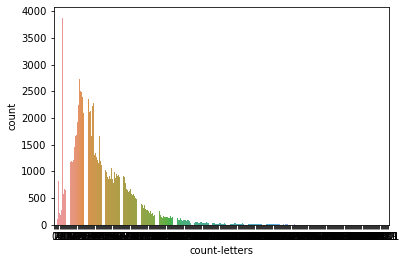

In [38]:
sns.countplot(x='count-letters', data=df);

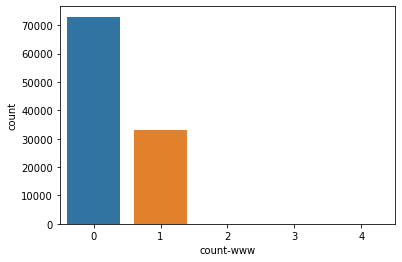

In [39]:
sns.countplot(x='count-www', data=df);

<AxesSubplot:>

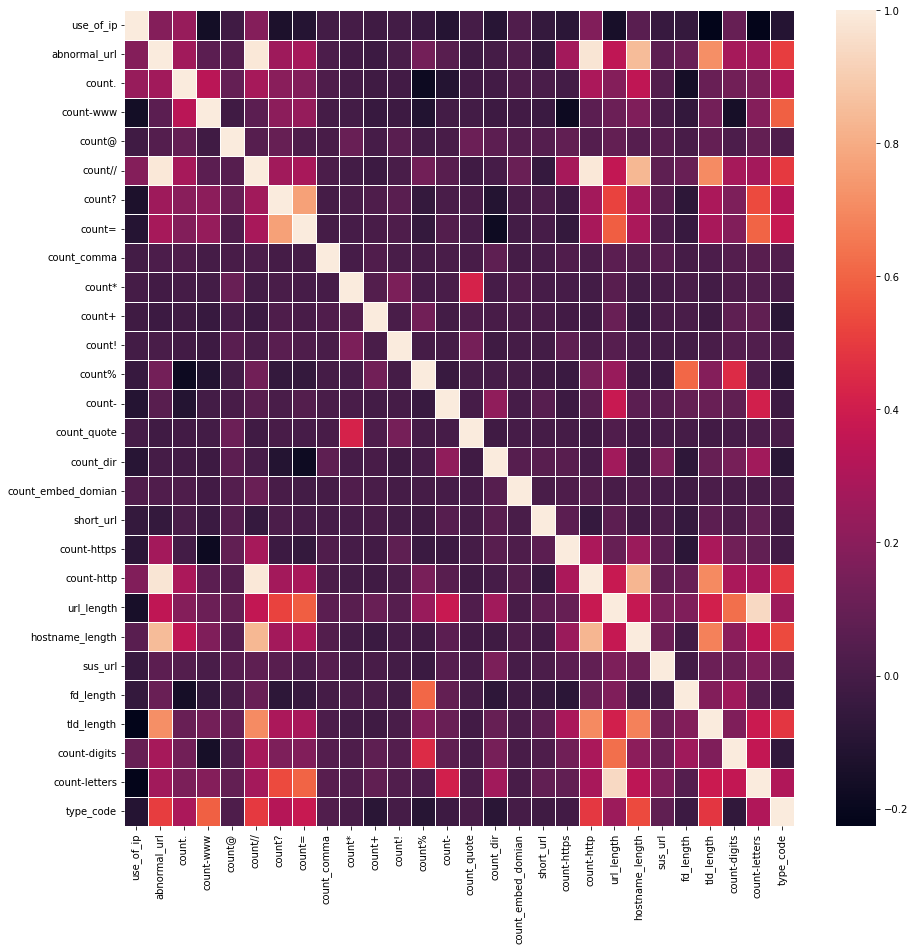

In [40]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)

In [41]:
df.describe()

use_of_ip   abnormal_url         count.      count-www  \
count  106230.000000  106230.000000  106230.000000  106230.000000   
mean        0.055286       0.632119       2.494154       0.313819   
std         0.228538       0.482231       1.208513       0.466111   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       2.000000       0.000000   
50%         0.000000       1.000000       2.000000       0.000000   
75%         0.000000       1.000000       3.000000       1.000000   
max         1.000000       1.000000      42.000000       4.000000   

              count@        count//         count?         count=  \
count  106230.000000  106230.000000  106230.000000  106230.000000   
mean        0.006213       0.635715       0.246644       0.819910   
std         0.083005       0.491049       0.440863       1.830862   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         0.000000       1.000000       0.000000       0.000000   
max         4.000000       9.000000      20.000000      51.000000   

         count_comma         count*  ...    count-https     count-http  \
count  106230.000000  106230.000000  ...  106230.000000  106230.000000   
mean        0.007267       0.000546  ...       0.114205       0.638040   
std         0.192889       0.030057  ...       0.322996       0.496922   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       1.000000   
75%         0.000000       0.000000  ...       0.000000       1.000000   
max        15.000000       4.000000  ...       5.000000       9.000000   

          url_length  hostname_length        sus_url      fd_length  \
count  106230.000000    106230.000000  106230.000000  106230.000000   
mean       63.438596        11.007823       0.059155       9.970329   
std        44.892604         9.907179       0.235915      13.205280   
min         1.000000         0.000000       0.000000       0.000000   
25%        34.000000         0.000000       0.000000       4.000000   
50%        51.000000        12.000000       0.000000       7.000000   
75%        81.000000        19.000000       0.000000      10.000000   
max      1641.000000       179.000000       1.000000     408.000000   

          tld_length   count-digits  count-letters      type_code  
count  106230.000000  106230.000000  106230.000000  106230.000000  
mean        1.255634       6.891227      45.534811       1.493335  
std         2.406801      12.080508      32.963025       1.108872  
min        -1.000000       0.000000       0.000000       0.000000  
25%        -1.000000       0.000000      25.000000       1.000000  
50%         2.000000       3.000000      37.000000       1.000000  
75%         3.000000       9.000000      59.000000       2.000000  
max        39.000000     738.000000    1301.000000       3.000000  

[8 rows x 28 columns]

In [42]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'count.', 'count-www',
       'count@', 'count//', 'count?', 'count=', 'count_comma', 'count*',
       'count+', 'count!', 'count%', 'count-', 'count_quote', 'count_dir',
       'count_embed_domian', 'short_url', 'count-https', 'count-http',
       'url_length', 'hostname_length', 'sus_url', 'fd_length', 'tld_length',
       'count-digits', 'count-letters', 'type_code'],
      dtype='object')

In [43]:
df.groupby('type').max()

url  use_of_ip  \
type                                                                     
benign    zzounds.com/cat--Bass-Guitars-Amps-and-Effects...          0   
malware                                  zvbotw96uflyag.bid          1   
phishing               þUß ï5ÐºÐã4ìýÕÅçÒJ.*/dB2
ô®Y¹          1   
spam           http://zshsq.com/view/html/index.html?3.html          0   

          abnormal_url  count.  count-www  count@  count//  count?  count=  \
type                                                                         
benign               1      21          1       2        2      20      19   
malware              1      18          2       1        3       3      19   
phishing             1      42          4       4        9       5      51   
spam                 1      11          2       0        1       4      22   

          count_comma  ...  count-https  count-http  url_length  \
type                   ...                                        
benign              0  ...            3           3        1040   
malware             0  ...            1           3         378   
phishing           15  ...            5           9        1641   
spam               10  ...            0           2         302   

          hostname_length  sus_url  fd_length  tld_length  count-digits  \
type                                                                      
benign                 21        1        408           6           664   
malware               149        1        259          26           106   
phishing              179        1        256          39           738   
spam                   49        1        223           7           132   

          count-letters  type_code  
type                                
benign              290          0  
malware             253          1  
phishing           1301          2  
spam                253          3  

[4 rows x 29 columns]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106230 entries, 0 to 106229
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   url                 106230 non-null  object
 1   type                106230 non-null  object
 2   use_of_ip           106230 non-null  int64 
 3   abnormal_url        106230 non-null  int64 
 4   count.              106230 non-null  int64 
 5   count-www           106230 non-null  int64 
 6   count@              106230 non-null  int64 
 7   count//             106230 non-null  int64 
 8   count?              106230 non-null  int64 
 9   count=              106230 non-null  int64 
 10  count_comma         106230 non-null  int64 
 11  count*              106230 non-null  int64 
 12  count+              106230 non-null  int64 
 13  count!              106230 non-null  int64 
 14  count%              106230 non-null  int64 
 15  count-              106230 non-null  int64 
 16  co

In [45]:
#create csv file from feature engineered dataframe for MLPclassifier hyper parameter fine tuning.
#df.to_csv('multiclass_set_randomized_features')

In [46]:
# looking at the correlations of the features.
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [47]:
# Looks like there are few correlated features in there. A lot of these make sense - for example longer URLs will probably contain letter counts. 

In [48]:
# malware rep as 1
#phishing rep as 2
#benign rep as 0
#spam rep as 3

sns.distplot(df.loc[df['type_code'] == 1]['short_url'], bins = 20, color='red')
sns.distplot(df.loc[df['type_code'] == 2]['short_url'], bins = 20, color='blue')
sns.distplot(df.loc[df['type_code'] == 3]['short_url'], bins = 20, color='orange')
sns.distplot(df.loc[df['type_code'] == 0]['short_url'], bins = 20, color='green')

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vijay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vijay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='short_url', ylabel='Density'>

In [49]:
sns.boxplot(df['url_length'])

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='url_length'>

In [50]:
#Predictor Variables
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count//', 'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters', 'count_comma', 'count*',
       'count+', 'count!','count_quote']]

#Target Variable
y = df['type_code']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [52]:
X_train

use_of_ip  abnormal_url  count.  count-www  count@  count//  count_dir  \
20052          0             1       3          0       0        1          1   
6994           0             1       3          1       0        1          1   
87703          0             1       3          1       0        1          5   
84118          0             0       3          1       0        0          5   
94368          0             1       1          0       0        1          4   
...          ...           ...     ...        ...     ...      ...        ...   
88179          0             1       4          0       0        1          2   
54163          1             1       3          0       0        1          2   
87031          0             1       2          0       0        1          2   
88581          0             0       5          1       0        0          4   
56662          0             1       4          1       0        1          4   

       count_embed_domian  short_url  count-https  ...  sus_url  fd_length  \
20052                   0          0            1  ...        0          9   
6994                    0          0            0  ...        0          9   
87703                   0          0            0  ...        0          2   
84118                   0          0            0  ...        0          8   
94368                   0          0            0  ...        0          5   
...                   ...        ...          ...  ...      ...        ...   
88179                   0          0            0  ...        0          3   
54163                   0          0            0  ...        0          7   
87031                   0          0            1  ...        0          5   
88581                   0          0            0  ...        0          6   
56662                   0          0            0  ...        0          9   

       tld_length  count-digits  count-letters  count_comma  count*  count+  \
20052           3             0             43            0       0       0   
6994            2             4             61            0       0       0   
87703           2             3             63            0       0       0   
84118          -1             0             64            0       0       0   
94368           3            68             60            0       0       0   
...           ...           ...            ...          ...     ...     ...   
88179           3            11             86            0       0       0   
54163          -1            11             15            0       0       0   
87031           3             3             28            0       0       0   
88581          -1             4             36            0       0       0   
56662           2             0             75            0       0       0   

       count!  count_quote  
20052       0            0  
6994        0            0  
87703       0            0  
84118       0            0  
94368       0            0  
...       ...          ...  
88179       0            0  
54163       0            0  
87031       0            0  
88581       0            0  
56662       0            0  

[84984 rows x 27 columns]

In [53]:
X_test

use_of_ip  abnormal_url  count.  count-www  count@  count//  count_dir  \
92053          1             1       4          0       0        1          2   
20369          0             1       3          1       0        1          3   
38086          0             1       2          0       0        1          1   
41805          0             1       4          1       0        1          2   
44321          0             1       4          1       0        1          1   
...          ...           ...     ...        ...     ...      ...        ...   
22085          0             0       1          0       0        0          1   
46580          0             1       1          0       0        1          2   
29205          0             1       2          0       0        1          2   
34668          0             0       2          1       0        0          3   
44827          0             1       2          0       0        1          6   

       count_embed_domian  short_url  count-https  ...  sus_url  fd_length  \
92053                   0          0            0  ...        0          4   
20369                   0          1            0  ...        0          9   
38086                   0          0            1  ...        0          9   
41805                   0          0            0  ...        0         13   
44321                   0          0            0  ...        0          9   
...                   ...        ...          ...  ...      ...        ...   
22085                   0          0            0  ...        0          0   
46580                   0          0            1  ...        0          3   
29205                   0          0            1  ...        0          3   
34668                   0          0            0  ...        0          3   
44827                   0          0            0  ...        1          8   

       tld_length  count-digits  count-letters  count_comma  count*  count+  \
92053          -1            13             16            0       0       0   
20369           3             0             42            0       0       0   
38086           3             0             26            0       0       0   
41805           6             0             66            0       0       0   
44321           5             3             65            0       0       0   
...           ...           ...            ...          ...     ...     ...   
22085          -1             4             23            0       0       0   
46580           3             0             27            0       0       0   
29205           3             3             31            0       0       0   
34668          -1             1             25            0       0       0   
44827           3            94            140            0       0       0   

       count!  count_quote  
92053       0            0  
20369       0            0  
38086       0            0  
41805       0            0  
44321       0            0  
...       ...          ...  
22085       0            0  
46580       0            0  
29205       0            0  
34668       0            0  
44827       0            0  

[21246 rows x 27 columns]

In [54]:
y_train

20052    2
6994     3
87703    3
84118    2
94368    0
        ..
88179    1
54163    1
87031    1
88581    2
56662    3
Name: type_code, Length: 84984, dtype: int32

In [55]:
y_test

92053    1
20369    3
38086    2
41805    3
44321    3
        ..
22085    0
46580    1
29205    1
34668    2
44827    2
Name: type_code, Length: 21246, dtype: int32

In [56]:
# 1st Model: XGBoost Classifier

model = xgb.XGBClassifier(n_estimators= 100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))


score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5229
           1       0.98      0.96      0.97      5485
           2       0.93      0.88      0.91      5354
           3       0.96      0.99      0.97      5178

    accuracy                           0.95     21246
   macro avg       0.95      0.95      0.95     21246
weighted avg       0.95      0.95      0.95     21246

accuracy:   0.949


In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [58]:
cm=confusion_matrix(y_test,y_pred,labels=[0,1,2,3])

plot_confusion_matrix(cm,classes=['benign', 'defacement','phishing','malware'])

Confusion matrix, without normalization


In [59]:

xgb_feature = model.feature_importances_
xgb_features = xgb_feature.tolist()

In [60]:
# 2nd Model: GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbdt.fit(X_train,y_train)
y_pred = gbdt.predict(X_test)
print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5229
           1       0.92      0.90      0.91      5485
           2       0.91      0.79      0.85      5354
           3       0.90      0.95      0.93      5178

    accuracy                           0.90     21246
   macro avg       0.90      0.90      0.90     21246
weighted avg       0.90      0.90      0.90     21246

accuracy:   0.901


In [61]:
cm=confusion_matrix(y_test,y_pred,labels=[0,1,2,3])

plot_confusion_matrix(cm,classes=['benign', 'defacement','phishing','malware'])

Confusion matrix, without normalization


In [62]:
gbdt_feature = gbdt.feature_importances_
gbdt_features = gbdt_feature.tolist()



In [63]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)


              precision    recall  f1-score   support

           0       0.90      0.97      0.93      5229
           1       0.95      0.93      0.94      5485
           2       0.94      0.84      0.88      5354
           3       0.92      0.96      0.94      5178

    accuracy                           0.92     21246
   macro avg       0.93      0.93      0.92     21246
weighted avg       0.93      0.92      0.92     21246

accuracy:   0.925


C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion matrix, without normalization


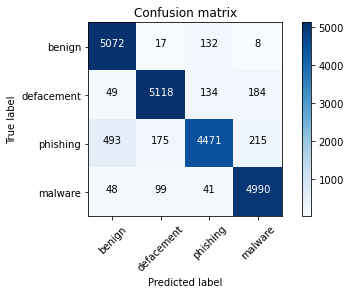

In [64]:
cm=confusion_matrix(y_test,y_pred,labels=[0,1,2,3])

plot_confusion_matrix(cm,classes=['benign', 'defacement','phishing','malware'])

In [65]:
# 3rd Model: LightGBM Classifier
lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)

LGB_C = lgb.fit(X_train, y_train)

y_pred = LGB_C.predict(X_test)
print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

C:\Users\vijay\anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5229
           1       0.97      0.95      0.96      5485
           2       0.93      0.88      0.90      5354
           3       0.96      0.98      0.97      5178

    accuracy                           0.94     21246
   macro avg       0.94      0.94      0.94     21246
weighted avg       0.94      0.94      0.94     21246

accuracy:   0.943


In [66]:
lgb_feature = lgb.feature_importances_
lgb_feature

array([  65,   72,  893,  338,   81,   84, 1083,   12,  102,  287,   49,
        234,  172,  642,  432, 1119, 1532,  150, 1787,  669, 1014,  962,
         53,   22,  100,   27,   19])

In [67]:
lgb_features = lgb_feature.tolist()



In [68]:
#Plotting ensemble Feature Importance
cols = X_train.columns
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
    
    'Gradient Boost feature importances': gbdt_features,
    'XG Boost feature importances': xgb_features, 
    'LGBM feature importances': lgb_features
                                   
    })
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

C:\Users\vijay\AppData\Local\Temp\ipykernel_12868\2865293844.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise


features  Gradient Boost feature importances  \
0     use_of_ip                            0.006152   
1  abnormal_url                            0.042783   
2        count.                            0.050048   

   XG Boost feature importances  LGBM feature importances        mean  
0                      0.020885                        65   21.675679  
1                      0.036919                        72   24.026567  
2                      0.016469                       893  297.688839

C:\Users\vijay\AppData\Local\Temp\ipykernel_12868\3645106442.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


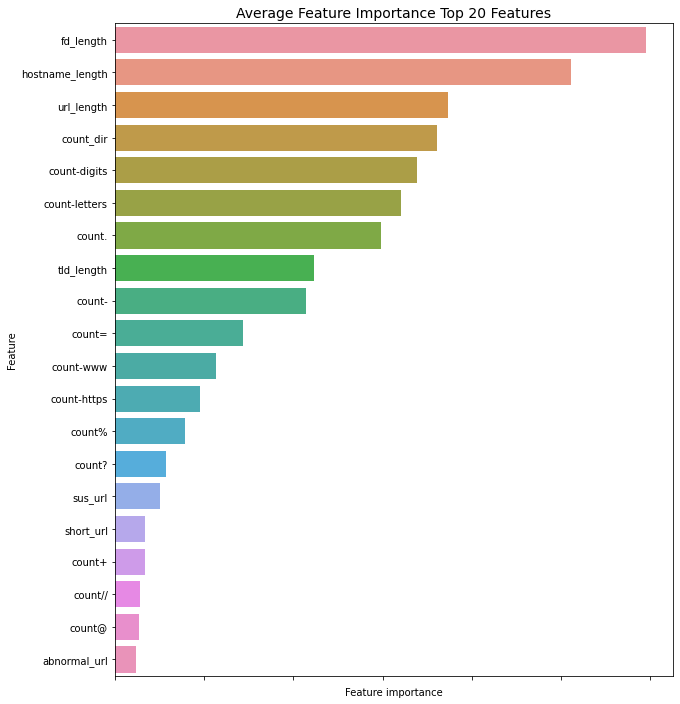

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_feature_importance():
    tmp = pd.DataFrame({'Feature': X_test.columns, 'Feature importance': feature_dataframe['mean'].values})
    tmp = tmp.sort_values(by='Feature importance',ascending=False).head(20)
    plt.figure(figsize = (10,12))
    plt.title('Average Feature Importance Top 20 Features',fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
plot_feature_importance()

#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  93.59%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5229
           1       0.96      0.97      0.97      5485
           2       0.90      0.87      0.89      5354
           3       0.96      0.96      0.96      5178

    accuracy                           0.94     21246
   macro avg       0.94      0.94      0.94     21246
weighted avg       0.94      0.94      0.94     21246

             Confusion_matrix 


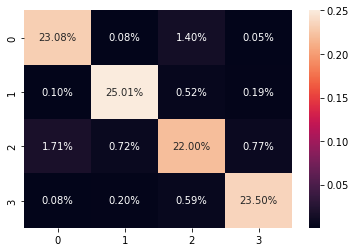

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  95.33%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5229
           1       0.99      0.97      0.98      5485
           2       0.93      0.90      0.91      5354
           3       0.97      0.99      0.98      5178

    accuracy                           0.95     21246
   macro avg       0.95      0.95      0.95     21246
weighted avg       0.95      0.95      0.95     21246

             Confusion_matrix 


###################- End -###################
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy :  90.03%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5229
           1       0.94      0.94      0.94      5485
           2       0.87      0.80      0.83      5354
           3       0.90      0.94      0.92      5178

    accuracy                           0.90     21246
   macro avg       0.90      0.90      0.90     21246
weighted avg       0.90      0.90      0.90     21246

             Confusion_matrix 


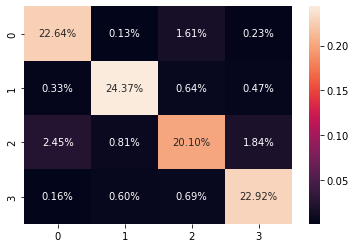

###################- End -###################
#############################################
######-Model => <class 'lightgbm.sklearn.LGBMClassifier'> 
Test Accuracy :  94.35%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5229
           1       0.97      0.95      0.96      5485
           2       0.93      0.88      0.90      5354
           3       0.96      0.98      0.97      5178

    accuracy                           0.94     21246
   macro avg       0.94      0.94      0.94     21246
weighted avg       0.94      0.94      0.94     21246

             Confusion_matrix 


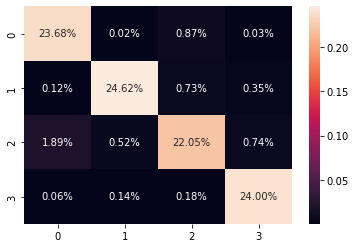

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._gb.GradientBoostingClassifier'> 
Test Accuracy :  90.70%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      5229
           1       0.92      0.91      0.91      5485
           2       0.90      0.81      0.85      5354
           3       0.91      0.95      0.93      5178

    accuracy                           0.91     21246
   macro avg       0.91      0.91      0.91     21246
weighted avg       0.91      0.91      0.91     21246

             Confusion_matrix 


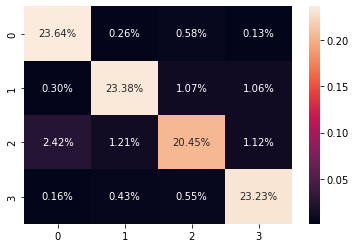

###################- End -###################
#############################################
######-Model => <class 'xgboost.sklearn.XGBClassifier'> 
Test Accuracy :  94.85%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5229
           1       0.98      0.96      0.97      5485
           2       0.93      0.88      0.91      5354
           3       0.96      0.99      0.97      5178

    accuracy                           0.95     21246
   macro avg       0.95      0.95      0.95     21246
weighted avg       0.95      0.95      0.95     21246

             Confusion_matrix 


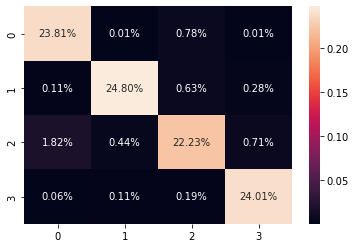

###################- End -###################
#############################################
######-Model => <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> 
Test Accuracy :  92.28%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5229
           1       0.93      0.94      0.94      5485
           2       0.94      0.82      0.87      5354
           3       0.91      0.98      0.94      5178

    accuracy                           0.92     21246
   macro avg       0.92      0.92      0.92     21246
weighted avg       0.92      0.92      0.92     21246

             Confusion_matrix 


C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


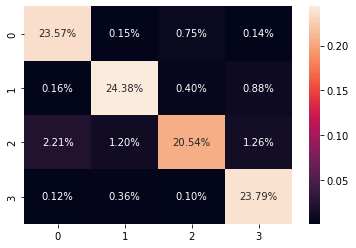

###################- End -###################


In [70]:
models = [DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,LGBMClassifier,GradientBoostingClassifier,XGBClassifier,MLPClassifier]
accuracy_test=[]

for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')


In [71]:
output = pd.DataFrame({"Model":['Decision Tree Classifier','Random Forest Classifier',
                                'KNeighbors Classifier','LGBMClassifier','GradientBoostingClassifier','XGBClassifier','MLPClassifier'],
                      "Accuracy":accuracy_test})

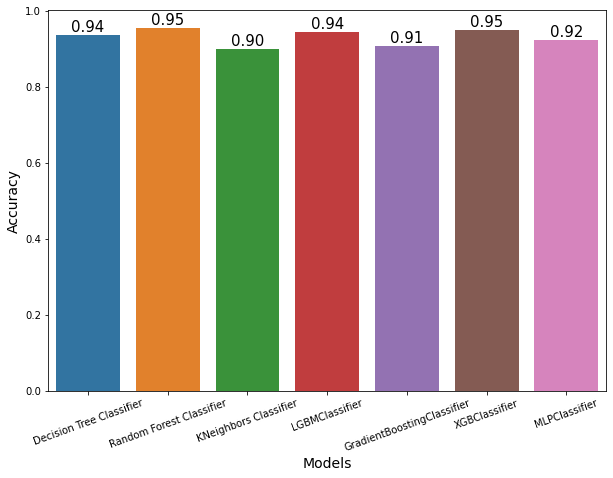

In [72]:
plt.figure(figsize=(10, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

In [66]:
#MLP hyper parameter fine tunining
# Method for evaluating results
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [67]:
len(X.columns)

27

In [68]:
def predict( X_train, y_train, **kwargs):
    mlp = MLPClassifier(**kwargs, random_state=1)
    mlp.fit(X_train, y_train)
    return mlp.predict(X_test)

In [69]:
def calculateScoresNoOutput(y_test, predictions):
    accuracy = 100*accuracy_score(y_test, predictions)
    precision = 100*precision_score(y_test, predictions,average='weighted')
    recall = 100*recall_score(y_test, predictions,average='weighted')
    f1 = 100*f1_score(y_test, predictions,average='weighted')
    return {'Accuracy':accuracy, 'F1': f1}

In [70]:
from sklearn import preprocessing

In [71]:
# Let's try the different solvers
solvers = ['lbfgs']
results = []
for solver in solvers:
    result_dict = calculateScoresNoOutput(y_test, predict(X_train, y_train, solver=solver))
    result_dict['Solver'] = solver
    results.append(result_dict)
df = pd.DataFrame(results, columns = ['Solver','Accuracy', 'F1'])
df

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver  Accuracy         F1
0  lbfgs  83.49807  83.261122

In [ ]:
#lbfgs has better convergence on relatively small datasets.

#(But what is algorithm convergence?

#(In simple words. If the error of solving is ranging within very small range (i.e., it is almost not changing), then that means the algorithm reached the solution (not necessary to be the best solution as it might be stuck at what so-called "local Optima").

#On the other hand, if the error is varying noticeably (even if the error is relatively small [like in your case the score was good], but rather the differences between the errors per iteration is greater than some tolerance) then we say the algorithm did not converge.

#Now, you need to know that Scikit-Learn API sometimes provides the user the option to specify the maximum number of iterations the algorithm should take while it's searching for the solution in an iterative manner:)

In [ ]:
solvers = ['sgd']
results = []
for solver in solvers:
    result_dict = calculateScoresNoOutput(y_test, predict(X_train, y_train, solver=solver))
    result_dict['Solver'] = solver
    results.append(result_dict)
df = pd.DataFrame(results, columns = ['Solver','Accuracy', 'F1'])
df

In [ ]:
solvers = ['adam']
results = []
for solver in solvers:
    result_dict = calculateScoresNoOutput(y_test, predict(X_train, y_train, solver=solver))
    result_dict['Solver'] = solver
    results.append(result_dict)
df = pd.DataFrame(results, columns = ['Solver','Accuracy', 'F1'])
df

In [ ]:
#Looks like the adam solver is the best, with highest accuray and F1 scores. We'll use that from now on.

In [437]:
# Generalise attempting different values
def try_different_values(values, column_name, X_train, y_train, **kwargs):
    results = []
    for value in values:
        kwargs[column_name] = value
        result_dict = calculateScoresNoOutput(y_test, predict(X_train, y_train, **kwargs))
        result_dict[column_name] = value
        results.append(result_dict)
    df = pd.DataFrame(results, columns = [column_name,'Accuracy', 'F1'])
    return df

In [438]:
activations = ['identity', 'logistic', 'tanh', 'relu']
try_different_values(activations, 'activation', X_train, y_train, solver='adam')

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


activation   Accuracy         F1
0   identity  82.326085  81.822092
1   logistic  93.212840  93.185700
2       tanh  92.939848  92.928270
3       relu  92.059682  92.068491

In [ ]:
#Another improvement using the logistic activation. Let's try adjusting the regularisation

In [439]:
alphas = []
for i in range(5,10):
     alphas.append(1/(2**i))
alpha_df = try_different_values(alphas, 'alpha', X_train, y_train, solver='adam', activation='logistic')

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multi

<AxesSubplot:xlabel='alpha'>

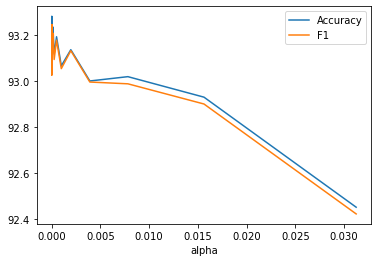

In [440]:
alpha_df.set_index('alpha', inplace=True)
alpha_df.plot()

In [441]:
print(alpha_df.loc[alpha_df['Accuracy'].idxmax()])
print(alpha_df.loc[alpha_df['F1'].idxmax()])

Accuracy    93.283442
F1          93.247219
Name: 7.450580596923828e-09, dtype: float64
Accuracy    93.283442
F1          93.247219
Name: 7.450580596923828e-09, dtype: float64


In [442]:
# The regularisation parameter doesn't seem to change much. Let's save it and try the batch size
# Store alpha
alpha=0.0001


In [443]:
batch_sizes = [2 ** e for e in range(10)]
batch_df = try_different_values(batch_sizes, 'batch_size', X_train, y_train, solver='adam', activation='logistic', alpha=alpha)

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multi